<a href="https://colab.research.google.com/github/karnabhonil/PDS_Workshop_1/blob/master/Final_Trump.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 1: Analysing Trump's Tweets
## Author: Nab Kar

Questions/objectives:
* What are Trump's most popular Tweets?
* What are his favorite words to use?
* How does President Trump feel about Bernie Sanders?
* How might we produce Trump-like Tweets?

## Part I: 

We first get the data into our Google Colab environment from a Github repository.



> ---
> *More on this*
>
> Github is a standard tool used by software developers and computer programmers of all types that makes it easy to share, update and keep track of code. It is used accross industry and academia for both personal and team-oriented projects.
>
> The Github repository for this project (https://github.com/karnabhonil/PDS_Workshop_1) simply contains the data (and some model weights) for this workshop. 

> ---


In [99]:
# This is a code cell--we can execute Python code here.
# Note that lines in the coding cells that start with '#' are comments and not interpretted as computer code.
# They are great for explaining what your code is doing in plain English!
# Also note the line below starts with '!'--these lines are interpretted as shell commands.
!git clone https://github.com/karnabhonil/PDS_Workshop_1.git

fatal: destination path 'PDS_Workshop_1' already exists and is not an empty directory.


The data is now in our environment. Confirm that it's in its proper place by clicking the folder on the left-hand side of the screen and checking what was exactly copied before continuing (you should be able to find a file called 'trumpstweets.csv' in the 'data' folder).

Python allows for users to use *libraries* (groups of related functions) created by the community. In fact, libraries are one of the reasons Python is so widely used! There is a vast body of great libraries that Python programmer rely on regularly.

In [0]:
# We import several key libraries here:
#   'pandas' for handling our data
#   'matplotlib.pyplot' for our graphs and figures
#   'TextBlob' for analysing our textual data
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

Note that we import each of the libraries *as* something else. This is for clarity and faster development. Now, we can use the shorthand 'plt' to refer to 'matplotlib.pyplot' (which is quite annoying to type out!).

We noted that 'pandas' is our go-to library for handling out data. We will use its *read_csv()* function to read in our raw data. Use this function to set a variable 'df' to hold our data. To find the data file, look through the directory on the left-hand side of the screen. Remember that filepath's take the format: 'folder1/folder2/another_folder/my_data.txt'.

Recall that we won't be using the full keyword 'pandas' when refering to the library, but rather the shorthand we defined when importing the library.

> ---
> *More on this*
>
> Pandas stores data in what it called a 'DataFrame'. You can think of it as a well-organized table or matrix of the data.
>
> ---

One convenient way to see what a variable holds is by simple typing the variable's name as it's own line of code at the end of a code cell. After setting the variable, let's check what the content of 'df' are by doing this.

In [102]:
### YOUR CODE HERE
df = pd.read_csv('PDS_Workshop_1/data/trumptweets.csv')
df

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
41117,1218962544372670467,https://twitter.com/realDonaldTrump/status/121...,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,NaN,NaN,NaN
41118,1219004689716412416,https://twitter.com/realDonaldTrump/status/121...,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,NaN,NaN,NaN
41119,1219053709428248576,https://twitter.com/realDonaldTrump/status/121...,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,NaN,#,NaN
41120,1219066007731310593,https://twitter.com/realDonaldTrump/status/121...,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,@ @ @,NaN,NaN


You've successfully loaded the data into Python! What does the data look like? What different information does it contain (and which of these are we primarily interested in)? How many samples does the data contain?

Let's do a few basic analyses with the data. First, we'll Trump's most popular Tweets, as guaged by retweets or favorites.

In [103]:
# sort by retweets
### YOUR CODE HERE
idx = df['retweets'].argsort()[::-1]
print(df.loc[idx]['content'][0])

# sort by favorites
### YOUR CODE HERE


Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!


Let's now look at Trump's most commonly used words and visualize it using a word cloud. We first just extract the contents of the DataFrame since the rest of the information is not too relevant.

In [76]:
# extracts the "content" column of 'df' and puts it into the variable 'content' 
### YOUR CODE HERE
content = df['content']
content


0        Be sure to tune in and watch Donald Trump on L...
1        Donald Trump will be appearing on The View tom...
2        Donald Trump reads Top Ten Financial Tips on L...
3        New Blog Post: Celebrity Apprentice Finale and...
4        "My persona will never be that of a wallflower...
                               ...                        
41117    I have never seen the Republican Party as Stro...
41118    Now Mini Mike Bloomberg is critical of Jack Wi...
41119    I was thrilled to be back in the Great State o...
41120    “In the House, the President got less due proc...
41121    A great show! Check it out tonight at 9pm. @ F...
Name: content, Length: 41122, dtype: object

From this corpus of all of Trump's Tweets, we might be interested in visualizing his _most commonly used words_ in the form of a wordcloud. Let's first find his most commonly used words.

In [104]:
import nltk
nltk.download('punkt')

# count the number of words (where all words are 5 characters or more)
word_count = {}
for tweet in content:
  words = nltk.word_tokenize(tweet)
  for word in words:
    if len(word) <= 4:
      continue
    if word in word_count:
      word_count[word] += 1
    else:
      word_count[word] = 1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


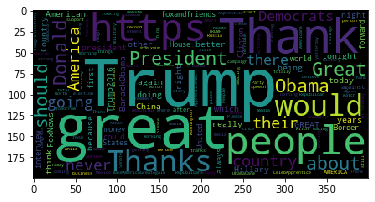

In [105]:
### produce a word cloud of top words
!pip install wordcloud
import wordcloud as wc

word_count.pop('realDonaldTrump')
wordcloud = wc.WordCloud()
wordcloud.fit_words(word_count)
plt.imshow(wordcloud)

Let's now apply \~machine learning\~ methods to do some *sentiment analysis*. In this case, that's finding out how Trump feels about Bernie.

Specifically, in our TextBlob library, there are two ways we are going to understand each Tweet's sentiment: _polarity_ ($\in [-1,1]$) and _subjectivity_ ($\in [0,1]$).

Part of the code is written for you. We will be *iterating* over each of the Tweets regarding Bernie, and then calling the *.sentiment.polarity* and *.sentiment.subjectivity* methods to get these two relevant quantities (see https://textblob.readthedocs.io/en/dev/api_reference.html#textblob.blob.TextBlob.sentiment for the documentation).

Let's store these values in a different column of *bernies*: *sentiment_polarity* and *sentiment_subjectivity*. To create a new column in our DataFrame, read the documentation on the _.loc_ method in:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html


In [106]:
# finds all occurances of "Bernie" and stores in 'bernies'
idx = content.str.find("Bernie") != -1
bernies = df[idx]
bernies

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
721,131041073102471168,https://twitter.com/realDonaldTrump/status/131...,Bernie Madoff and Tony La Russa in today's # t...,2011-10-31 17:13:21,35,14,NaN,#,NaN
3929,259334309092130818,https://twitter.com/realDonaldTrump/status/259...,Congratulations to Bernie Marcus & Herman Cain...,2012-10-19 18:44:52,80,16,@,#,NaN
19543,551583852276482049,https://twitter.com/realDonaldTrump/status/551...,""" @ BernieSandner: @ realDonaldTrump @ Apprent...",2015-01-04 04:40:12,20,31,@ @ @,NaN,NaN
19577,551764464794869760,https://twitter.com/realDonaldTrump/status/551...,"""@emilyplacido: @ realDonaldTrump @ BernieSand...",2015-01-04 16:37:54,4,19,@emilyplacido @ @ @ @,#,NaN
23518,615154594943995904,https://twitter.com/realDonaldTrump/status/615...,""" @ WGinetta: @ CNNSotu THE @ realDonaldTrump ...",2015-06-28 15:47:39,94,226,@ @ @ @,#,NaN
...,...,...,...,...,...,...,...,...,...
41045,1216435180220620807,https://twitter.com/realDonaldTrump/status/121...,Wow! Crazy Bernie Sanders is surging in the po...,2020-01-12 20:02:01,25346,145281,NaN,NaN,NaN
41054,1216743062543663105,https://twitter.com/realDonaldTrump/status/121...,Bernie Sander’s volunteers are trashing Elizab...,2020-01-13 16:25:26,19937,109525,NaN,NaN,NaN
41095,1218195021930926082,https://twitter.com/realDonaldTrump/status/121...,They are rigging the election again against Be...,2020-01-17 16:35:00,27186,120635,NaN,NaN,NaN
41096,1218195035646242820,https://twitter.com/realDonaldTrump/status/121...,"....Joe Biden, and Bernie is shut out again. V...",2020-01-17 16:35:04,14643,71592,NaN,NaN,NaN


In [107]:
# apply sentiment analysis to Bernie-related Tweets
for idx, row in bernies.iterrows():
  single_tweet = TextBlob(row.content)
  ### YOUR CODE HERE
  bernies.loc[idx, 'sentiment_pol'] = single_tweet.sentiment.polarity
  bernies.loc[idx, 'sentiment_sub'] = single_tweet.sentiment.subjectivity


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Now our _bernies_ DataFrame also contains values for Trump's sentiment! Let's compute some basic quantities of interest for these data. Specifically, print out the mean value and standard deviation of the _sentiment_polarity_ column we just created. Additionally, quickly plot a histogram of the values using _plt.hist()_ (note: call _plt.show()_ to show the plot). Repeat this for the _sentiment_subjectivity_ column.

Polarity:
mean: -0.03795137134457933
std: 0.3075110766016647


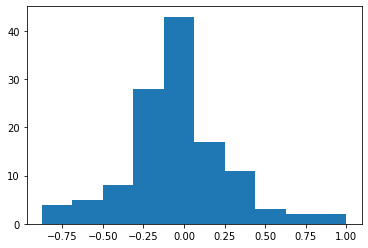

Polarity:
mean: 0.460923021911843
std: 0.26221662719989514


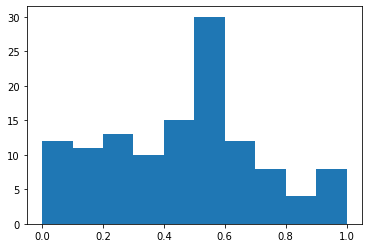

In [108]:
# compute basic statistics and plot
### YOUR CODE HERE
print('Polarity:')
print('mean:', bernies['sentiment_pol'].mean())
print('std:', bernies['sentiment_pol'].std())
plt.hist(bernies['sentiment_pol'])
plt.show()

print('Subjectivity:')
print('mean:', bernies['sentiment_sub'].mean())
print('std:', bernies['sentiment_sub'].std())
plt.hist(bernies['sentiment_sub'])
plt.show()


Which way is the distribution skewed (are there a lot of Tweets to the far left/very negative or the far right/very positive)? What is the average (how does Trump feel, on average, about Bernie)?

## Part II: Generating Trump-like Tweets
Now let's have some fun! An exciting part of AI research is figuring out how machines can _generate_ content that seems like it was produced by a human. In this section, we generate Trump-like Tweets using _textgenrnn_, a library for processing (and creating) texts.

This part is suppose to be fun, so we've done most of the heavy lifting for you. That is, we're trained a model on Trump's Tweets and now we can call on it to generate things that look like something our president would send out.

In [0]:
from textgenrnn import textgenrnn
# load the model trained on Trump's Tweets
textgen = textgenrnn('./PDS_Workshop_1/weights/textgenrnn_weights.hdf5')

We can now call the _.generate()_ method to generate Tweets. We all _help()_ to see some of its arguments.

Two fun thing's to play with are 'temperature', which controls how _creative_ the model will be, and 'prefix', which allows you to force the model to start the generated text with specified text. Play around with these settings and see what you get!

In [114]:
help(textgen.generate)
### YOUR CODE HERE
textgen.generate(4, temperature=0.5)

Help on method generate in module textgenrnn.textgenrnn:

generate(n=1, return_as_list=False, prefix=None, temperature=0.5, max_gen_length=300, interactive=False, top_n=3) method of textgenrnn.textgenrnn.textgenrnn instance

The only job @ BarackObama has gone to see the couple on the rate of thinking.

The Fed continues to record the world 'spied to spending the Balance Finance no re-end out of the solar country's economy. It missed and but the job has been doing nothing the second lide of his spending...http://bit.ly/Anny America would be any excited the way on @ BarackObama's folloars in Iraq 

The Fed continues to a great guy, be so popular that I tell me proud of the Iranian work in today's # trumpvlog… http://bit.ly/fqvDT

Why is the UN is our oil to every declisd confast.

